## 농구 선수의 게임 데이터를 활용한 포지션 예측
- NBA 농구 선수들의 게임 기록을 데이터를 사용해서 특정 농구 선수의 포지션을 예측하자

In [48]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('../data/basketball.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [50]:
mydf = df.copy()

#### Column Desc.
- Player : 선수 이름
- Pos : Position(SG : Shooting Guard(3점슛을 많이함), C : Center(리바운드보는, 키큰애들))
- 3P : 한 경기당 평균 3점슛 성공 횟수 
- 2P : 한 경기당 평균 2점슛 성공 횟수
- TRB : 한 경기당 평균 리바운드 성공 횟수
- AST : 한 경기당 평균 어시스트 성공 횟수
- STL : 한 경기당 평균 스틸 성공 횟수
- BLK : 한 경기당 평균 블로킹 성공 횟수

In [51]:
# 포지션의 종류
len(df.Pos.unique())

2

In [52]:
df.Pos.value_counts()

Pos
SG    50
C     50
Name: count, dtype: int64

### 포지션 별 내용
- C : Center는 골대나 포스트 근처에서 슛을 블로킹하고, 리바운드하며, 바깥으로 쳐내며, 골대 근처에서 2점슛으로 득점을 한다.
- SG : shooting Guard는 코트내에서 3점슛등 장거리에서 슛을 해서 점수를 얻는 역할

### 데이터 시각화

In [53]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 스틸과 2점슛 : SG, C

In [54]:
import seaborn as sns

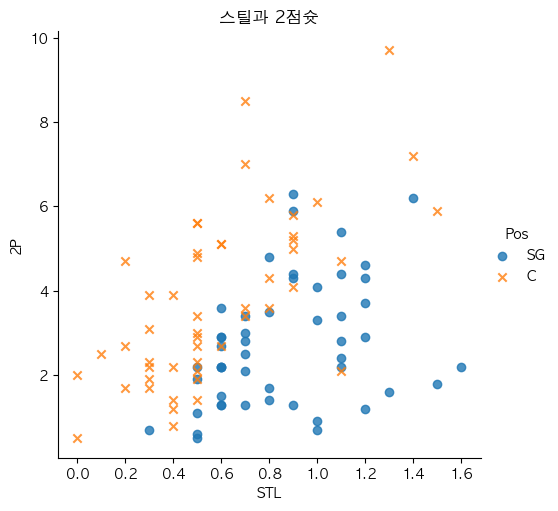

In [55]:
sns.lmplot(
    x = "STL",
    y = "2P",
    data=df,
    fit_reg=False,
    hue = 'Pos',
    markers=['o', 'x']
)

plt.title("스틸과 2점슛")

plt.show()



### 어시스트와 2점슛


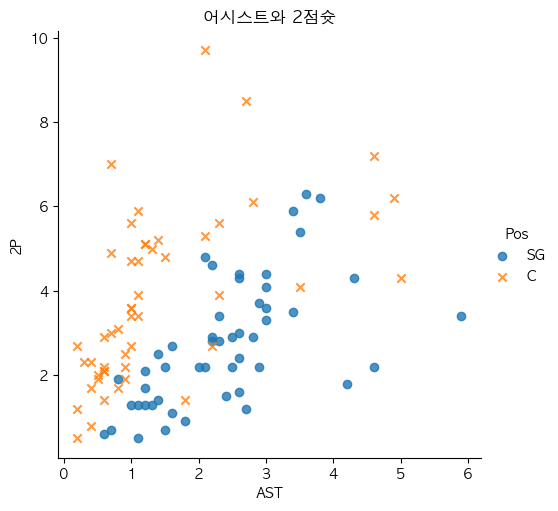

In [56]:
sns.lmplot(
    x = "AST",
    y = "2P",
    data=df,
    fit_reg=False,
    hue = 'Pos',
    markers=['o', 'x']
)

plt.title("어시스트와 2점슛")

plt.show()

> 2P, AST, STL의 속성으로 분포시킬 경우, 슈팅가드와 센터의 경계가 너무 근접해서 분류하기에 모호하다.

### 블로킹과 3점슛에 대해 C와 SG의 시각화

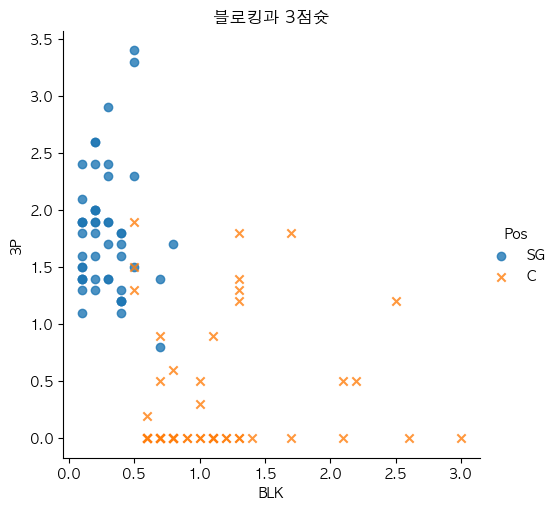

In [57]:
sns.lmplot(
    x = "BLK",
    y = "3P",
    data=df,
    fit_reg=False,
    hue = 'Pos',
    markers=['o', 'x']
)

plt.title("블로킹과 3점슛")

plt.show()

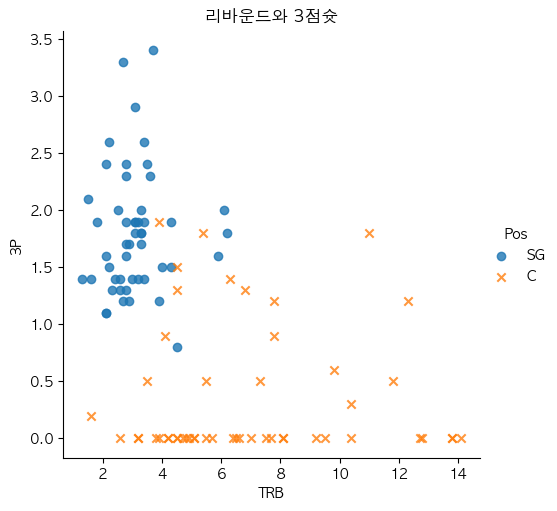

In [58]:
sns.lmplot(
    x = "TRB",
    y = "3P",
    data=df,
    fit_reg=False,
    hue = 'Pos',
    markers=['o', 'x']
)

plt.title("리바운드와 3점슛")

plt.show()

### 데이터 다듬기
: 분별력이 없는 특징(Feature)를 데이터에서 제거  
시각화를 통해 확인해 본 결과 2P, AST, STL은 분별력이 없다.

In [59]:
# 2P, AST, STL을 데이터에서 제거

df.drop(['2P', 'AST', 'STL'], axis = 'columns', inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


### 학습 데이터와 검증 데이터로 나누기


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df_data =    df.iloc[:, 2:]
df_target = df.iloc[:, 1]

In [62]:
df_target

0     SG
1      C
2      C
3      C
4     SG
      ..
95     C
96    SG
97    SG
98     C
99    SG
Name: Pos, Length: 100, dtype: object

In [64]:
df_train, df_test =  train_test_split(
    df,
    random_state=42,
    test_size=0.2
)

In [81]:
df_train.to_csv('../data/basketball_train.csv', index=None)
df_test.to_csv('../data/basketball_test.csv', index=None)

In [67]:
df_train.shape

(80, 5)

In [76]:
mydf2 =  pd.concat([mydf.iloc[:, 2:], mydf['Pos'] == 'C'], axis=1 )
mydf2.head()

,3P,2P,TRB,AST,STL,BLK,Pos
0,1.4,0.6,1.3,0.6,0.5,0.1,False
1,0.0,4.7,7.7,1.1,1.1,1.0,True
2,0.0,2.3,4.5,0.3,0.5,0.6,True
3,0.0,0.8,2.6,0.4,0.4,0.6,True
4,1.5,3.5,4.3,3.4,0.8,0.5,False


In [82]:
mydf2.corr()

,3P,2P,TRB,AST,STL,BLK,Pos
3P,1.000000,-0.094914,-0.498036,0.485010,0.353517,-0.534588,-0.787110
2P,-0.094914,1.000000,0.680882,0.396094,0.353558,0.482056,0.290651
TRB,-0.498036,0.680882,1.000000,0.026689,0.130441,0.707542,0.628595
AST,0.485010,0.396094,0.026689,1.000000,0.640802,-0.148161,-0.386874
STL,0.353517,0.353558,0.130441,0.640802,1.000000,-0.138208,-0.401425
BLK,-0.534588,0.482056,0.707542,-0.148161,-0.138208,1.000000,0.700786
Pos,-0.787110,0.290651,0.628595,-0.386874,-0.401425,0.700786,1.000000
